In [1]:
from os import listdir
import os, contextlib
import sys
sys.path.append('../..')

import exp_test_quarantine
import numpy as np

import pandas as pd
from matplotlib.pyplot import *

from statsmodels.robust import mad

from IPython.display import display
pd.set_option('display.expand_frame_repr', False)


In [2]:
my_parser = exp_test_quarantine.argument_parser()
defaults = vars(my_parser.parse_args(""))
print(defaults)

{'S': 1000, 'T': 40, 'p0': 0.0001, 'p1': 0.025, 'alpha': 0.001, 'beta': 0.01, 'R0': 2.5, 'policy_start': 30, 'test_capacity': 0.01, 'qDays': 14, 'pDays': 5, 'pEI_threshold': 0.3, 'pSR_threshold': 0.7, 'seed': 42, 'iteration': 0, 'interactive': 'on', 'policy': 'contact'}


In [3]:
#directory = 'experiments/exp_5.2'
directory = '.'

In [4]:


def process( dir, args) :
    traces = np.genfromtxt(f'{directory}/{dir}/traces.csv', delimiter=',')
    qstats = np.genfromtxt(f'{directory}/{dir}/qstats.csv', delimiter=',')

    tmp = traces.cumsum(1)==args['T']-1

    res = { 'PS': tmp[:,0].mean(),
            'PE': (~tmp[:,0] & tmp[:,1]).mean(),
            'PI': (~tmp[:,0] & ~tmp[:,1] & tmp[:,2]).mean(),
            'PR': (~tmp[:,2]).mean(),
            'QS': qstats[:,0].sum(),
            'QE': qstats[:,1].sum(),
            'QI': qstats[:,2].sum(),
            'QR': qstats[:,3].sum(),
            'Q' : qstats.sum(),
            }
    return res

In [5]:
rows = []

for cmd in listdir(directory):
    try:
        args = cmd.replace("_"," ")
        with open(os.devnull, 'w') as devnull:
            with contextlib.redirect_stderr(devnull):
                args = vars(my_parser.parse_args(args.split()))
        res = process(cmd, args)
        rows.append({**args, **res})

    except SystemExit:
        print("error parsing {}, ignored".format(cmd) )

df = pd.DataFrame(rows)

error parsing Makefile.new, ignored
error parsing experiment52.png, ignored
error parsing __pycache__, ignored
error parsing analyse_results.ipynb, ignored
error parsing results, ignored
error parsing .ipynb_checkpoints, ignored
error parsing exp_test_quarantine.py, ignored
error parsing Makefile, ignored


In [6]:
iterations = ['iteration','seed']

results = [k for k in df.keys() if k not in defaults]
args = [k for k in defaults.keys() if k not in iterations]


print("iterations: ", iterations)
print("results: ", results)
print("args: ", args)


iterations:  ['iteration', 'seed']
results:  ['PS', 'PE', 'PI', 'PR', 'QS', 'QE', 'QI', 'QR', 'Q']
args:  ['S', 'T', 'p0', 'p1', 'alpha', 'beta', 'R0', 'policy_start', 'test_capacity', 'qDays', 'pDays', 'pEI_threshold', 'pSR_threshold', 'interactive', 'policy']


In [7]:
df_pivot = pd.pivot_table(df,
                          values = results,
                          index = args,
                          aggfunc=['count',np.mean, np.std, np.median, mad])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_pivot)

count                                     mean                                                                                  std                                                                                                median                                                                          mad                                                                                              
                                                                                                                                PE  PI  PR  PS   Q  QE  QI  QR  QS       PE       PI       PR       PS          Q      QE       QI       QR         QS        PE        PI        PR        PS            Q          QE           QI           QR           QS      PE      PI      PR      PS         Q     QE      QI      QR        QS        PE        PI        PR        PS            Q          QE           QI           QR           QS
S    T   p0     p1    alpha beta R0  policy_start test_capacity qDays pDays pEI_threshold pSR_threshold interactive policy                                                                                                                                                                                                                                                                                                                                                                                                                       
1000 90  0.0001 0.025 0.001 0.01 2.5 30           0.01          14    7     0.2           0.3           off         lockdown     1   1   1   1   1   1   1   1   1  0.00000  0.00400  0.01800  0.97800   59000.00   35.00   287.00   784.00   57894.00       NaN       NaN       NaN       NaN          NaN         NaN          NaN          NaN          NaN  0.0000  0.0040  0.0180  0.9780   59000.0   35.0   287.0   784.0   57894.0  0.000000  0.000000  0.000000  0.000000     0.000000    0.000000     0.000000     0.000000     0.000000
                                                                                                                    no           1   1   1   1   1   1   1   1   1  0.06500  0.17000  0.11600  0.64900       0.00    0.00     0.00     0.00       0.00       NaN       NaN       NaN       NaN          NaN         NaN          NaN          NaN          NaN  0.0650  0.1700  0.1160  0.6490       0.0    0.0     0.0     0.0       0.0  0.000000  0.000000  0.000000  0.000000     0.000000    0.000000     0.000000     0.000000     0.000000
                                                                                                                    score        1   1   1   1   1   1   1   1   1  0.01200  0.03100  0.04300  0.91400    7664.00   48.00   477.00   137.00    7002.00       NaN       NaN       NaN       NaN          NaN         NaN          NaN          NaN          NaN  0.0120  0.0310  0.0430  0.9140    7664.0   48.0   477.0   137.0    7002.0  0.000000  0.000000  0.000000  0.000000     0.000000    0.000000     0.000000     0.000000     0.000000
                                                                                                                    symptom      1   1   1   1   1   1   1   1   1  0.01900  0.05800  0.08400  0.83900     698.00    0.00   678.00    20.00       0.00       NaN       NaN       NaN       NaN          NaN         NaN          NaN          NaN          NaN  0.0190  0.0580  0.0840  0.8390     698.0    0.0   678.0    20.0       0.0  0.000000  0.000000  0.000000  0.000000     0.000000    0.000000     0.000000     0.000000     0.000000
                                                                                          0.4           off         lockdown     1   1   1   1   1   1   1   1   1  0.00100  0.00400  0.01300  0.98200   59000.00   49.00   184.00   552.00   58215.00       NaN       NaN       NaN       NaN          NaN         NaN          NaN          NaN          NaN  0.0010  0.0040  0.0130  0.9820   59000.0   49.0   184.0   552.0

In [8]:
filter = {'S':1000, 'T':150, 'p0':0.0001, 'p1':0.025, 'alpha':0.001, 'beta': 0.01, 'R0':2.5, 
          'policy_start':30, 'test_capacity':0.01 }

idx = np.r_[[df_pivot.index.get_level_values(k)==v for k,v in filter.items()]].all(0)


df_52 = df_pivot[idx]

display(df_52)

count                                     mean  ...    median       mad                                                                                              
                                                                                                                                PE  PI  PR  PS   Q  QE  QI  QR  QS       PE  ...        QS        PE        PI        PR        PS            Q          QE           QI           QR           QS
S    T   p0     p1    alpha beta R0  policy_start test_capacity qDays pDays pEI_threshold pSR_threshold interactive policy                                                   ...                                                                                                                  
1000 150 0.0001 0.025 0.001 0.01 2.5 30           0.01          2     5     0.3           0.7           off         symptom     20  20  20  20  20  20  20  20  20  0.01080  ...       0.0  0.008154  0.043737  0.062269  0.018533    20.756431    0.000000    20.756431     0.000000     0.000000
                                                                      7     0.3           0.7           off         contact     20  20  20  20  20  20  20  20  20  0.01960  ...    9983.0  0.006672  0.019274  0.117867  0.108230  2054.145374  106.006059   584.886575  1106.021255  1023.736832
                                                                7     5     0.3           0.7           off         symptom     20  20  20  20  20  20  20  20  20  0.02185  ...       0.0  0.006672  0.027428  0.077095  0.037065   231.285946    0.000000   230.544645     1.482602     0.000000
                                                                      7     0.3           0.7           off         contact     20  20  20  20  20  20  20  20  20  0.00875  ...   15022.5  0.004448  0.011861  0.063752  0.059304  4008.956399   67.458401   280.211819   853.237577  2658.305778
                                                                14    5     0.3           0.7           off         lockdown    20  20  20  20  20  20  20  20  20  0.00050  ...  116243.0  0.000000  0.001483  0.005189  0.005930     0.000000   22.980334   134.175501   816.913822   766.505347
                                                                                                                    no          20  20  20  20  20  20  20  20  20  0.00740  ...       0.0  0.004448  0.026687  0.038548  0.017050     0.000000    0.000000     0.000000     0.000000     0.000000
                                                                                                                    symptom     20  20  20  20  20  20  20  20  20  0.02095  ...       0.0  0.005930  0.024463  0.190514  0.214236  1368.441848    0.000000  1329.152889    49.667174     0.000000
                                                                            0.5           0.6           off         score       20  20  20  20  20  20  20  20  20  0.02460  ...     143.0  0.007413  0.024463  0.113419  0.118608   727.216388    1.482602   717.579474    43.736765    11.119517
                                                                                          0.7           off         score       20  20  20  20  20  20  20  20  20  0.01865  ...     170.5  0.003707  0.020756  0.123056  0.104523   921.437279    2.223903   816.172521   117.866876    14.826022
                                                                                          0.8           off         score       20  20  20  20  20  20  20  20  20  0.01435  ...     203.5  0.005189  0.028911  0.146778  0.186067  1539.682404    0.000000  1311.361662   237.216355    27.428141
                                                                      7     0.3           0.7           off         contact     20  20  20  20  20  20  20  20  20  0.00390  ...   15882.0  0.002224  0.007413  0.027428  0.033359  3716.883762   56.338884   355.824532   372.133157  2962.239233
                                                   

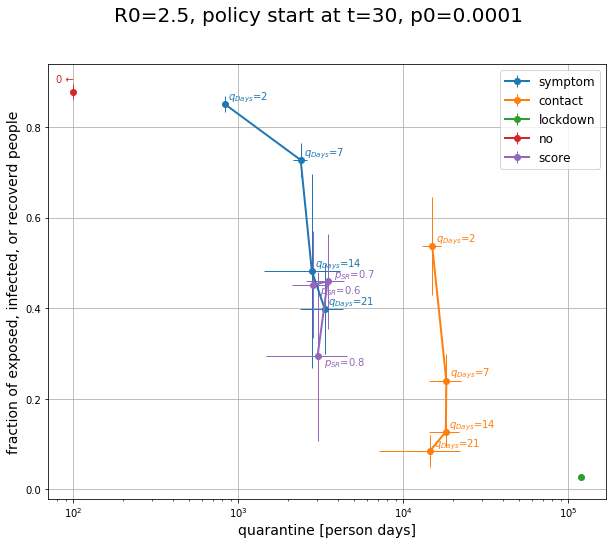

In [9]:
mu='median'
si='mad'

fig = figure(figsize=(10,8))
policies = df_52.index.unique('policy').values

for policy in policies:
    
    idx = df_52.index.get_level_values('policy').values==policy

    qDays = df_52.loc[idx].index.get_level_values('qDays').values
    pSR_threshold = df_52.loc[idx].index.get_level_values('pSR_threshold').values
    
    x,y = df_52[idx][mu][['Q','PS']].values.T
    xd,yd = df_52[idx][si][['Q','PS']].values.T
    
    if policy=='no':
        x+=100
    y = 1-y
    
    eb=errorbar(x,y, xerr=xd, yerr=yd, fmt='-o', linewidth=2, elinewidth=1)
    
    if policy in ['contact','symptom']:
        for x,y,z in zip(x,y,qDays): 
            annotate("$q_{{Days}}$={}".format(z), (x*1.05,y+0.01),color=eb[0].get_color())
            pass
    
    if policy in ['score']:
        for x,y,z in zip(x,y,pSR_threshold): 
            y_offset = +0.01 if z==0.7 else -0.02
            annotate("$p_{{SR}}$={}".format(z), (x*1.1,y+y_offset),color=eb[0].get_color())
            pass
    

    if policy in ['no']:
        annotate("0 ←", (x[0],y[0]+0.02), ha='right', color=eb[0].get_color())
    

gca().set_xscale('log')
grid(True)

legend(policies)

xlabel('quarantine [person days]',fontsize=14)
ylabel('fraction of exposed, infected, or recoverd people',fontsize=14)
legend(policies,fontsize=12)
grid(True)
suptitle("R0={}, policy start at t={}, p0={}".format(filter['R0'], filter['policy_start'],filter['p0']),
         fontsize=20)

fig.savefig('experiment52.png')